In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wandb

project_name = "master-thesis"

def get_runs(project_name, run_name):
    """
    Returns all runs with a given name in a given project.
    """
    api = wandb.Api()
    runs = api.runs(
        project_name, {
            "$and": [
                {"displayName": run_name},
                {"state": "finished"},
                {"tags": "phcd_paper_splits_tfds"}
                ]
            })
    return [run.id for run in runs]

interesting_run_names = ["architecture-baseline", "architecture-1", "architecture-2", "architecture-4", "architecture-5", "architecture-6", "architecture-7"]
architectures = ["Bazowa", "Architektura A", "Architektura B", "Architektura C", "Architektura D", "Architektura E", "Architektura F"]

Getting results from run:  architecture-baseline


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-1


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-2


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-4


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-5


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-6


wandb:   1 of 1 files downloaded.  


Getting results from run:  architecture-7


wandb:   1 of 1 files downloaded.  


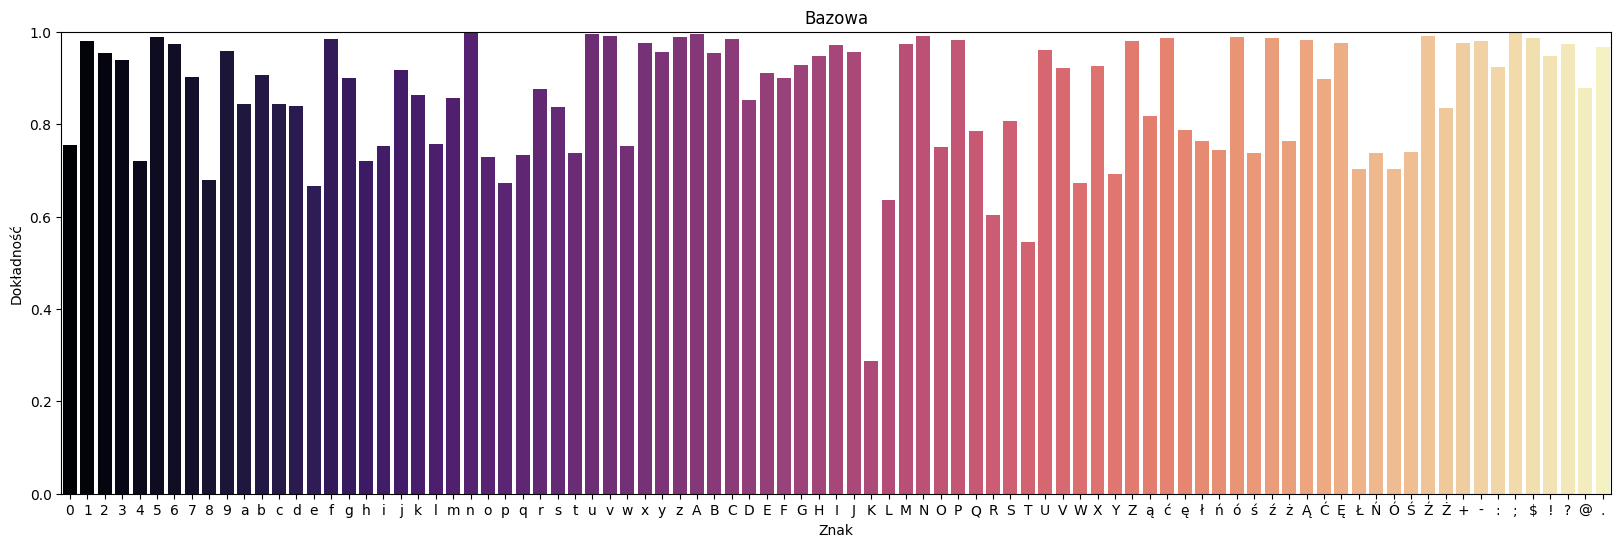

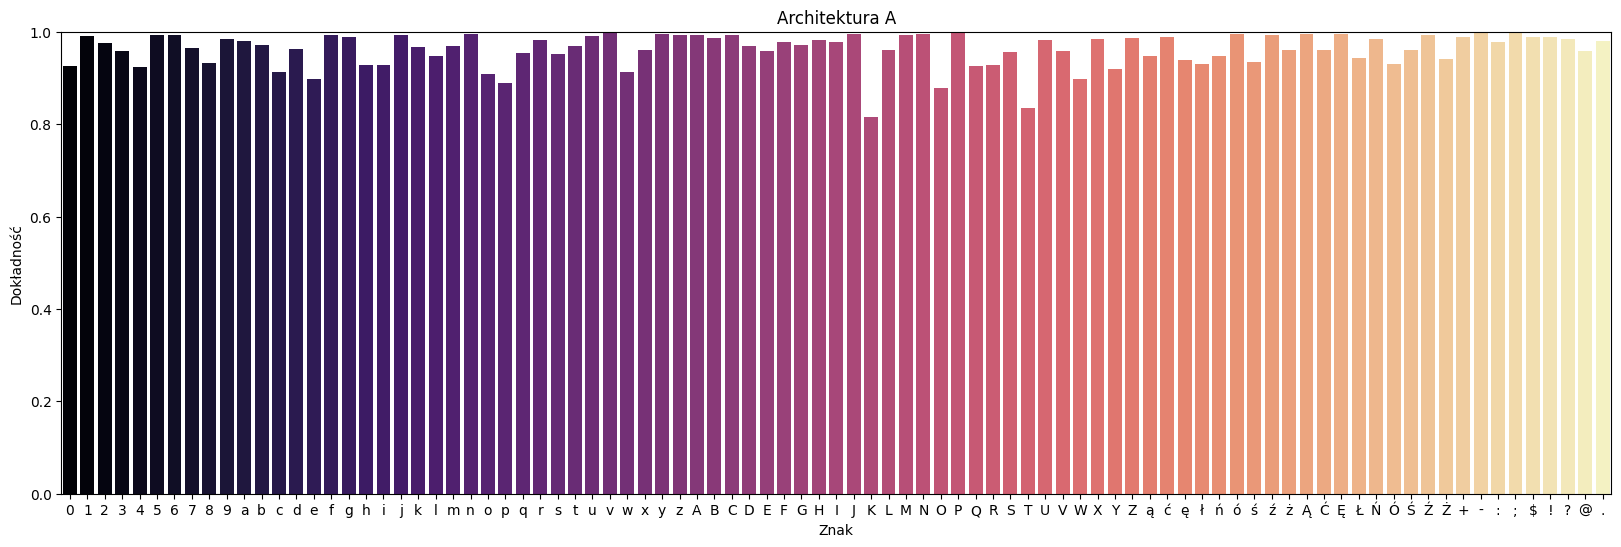

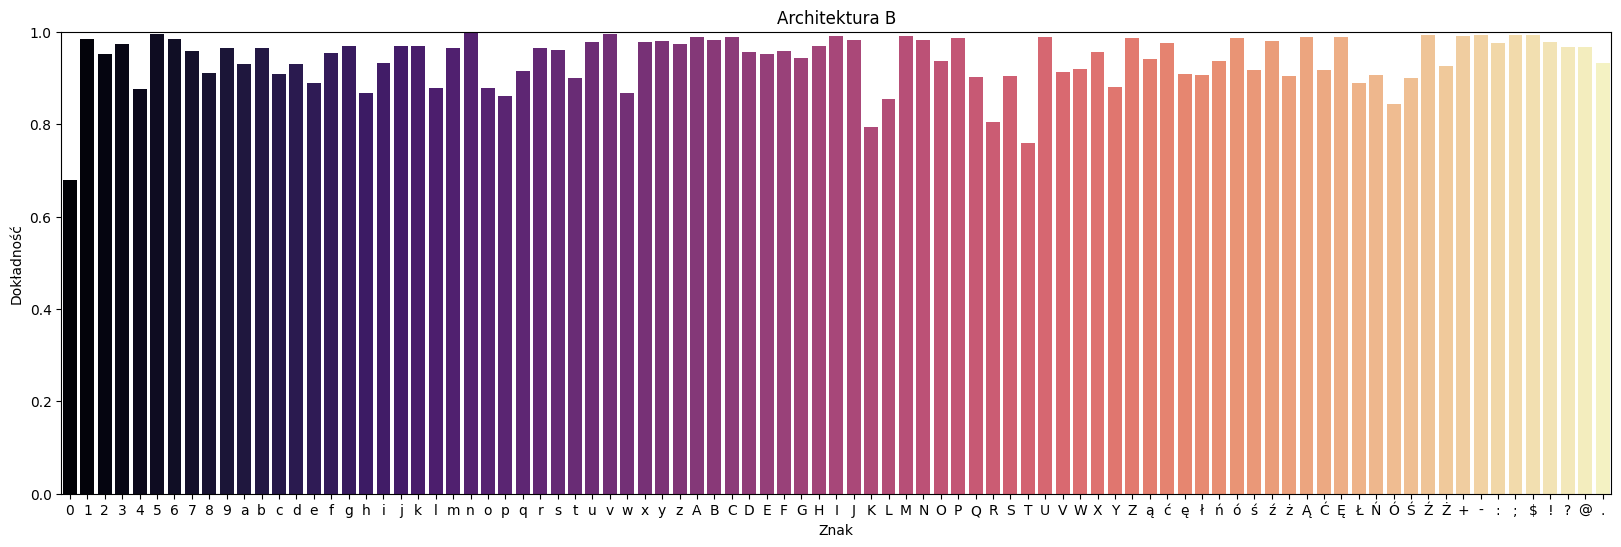

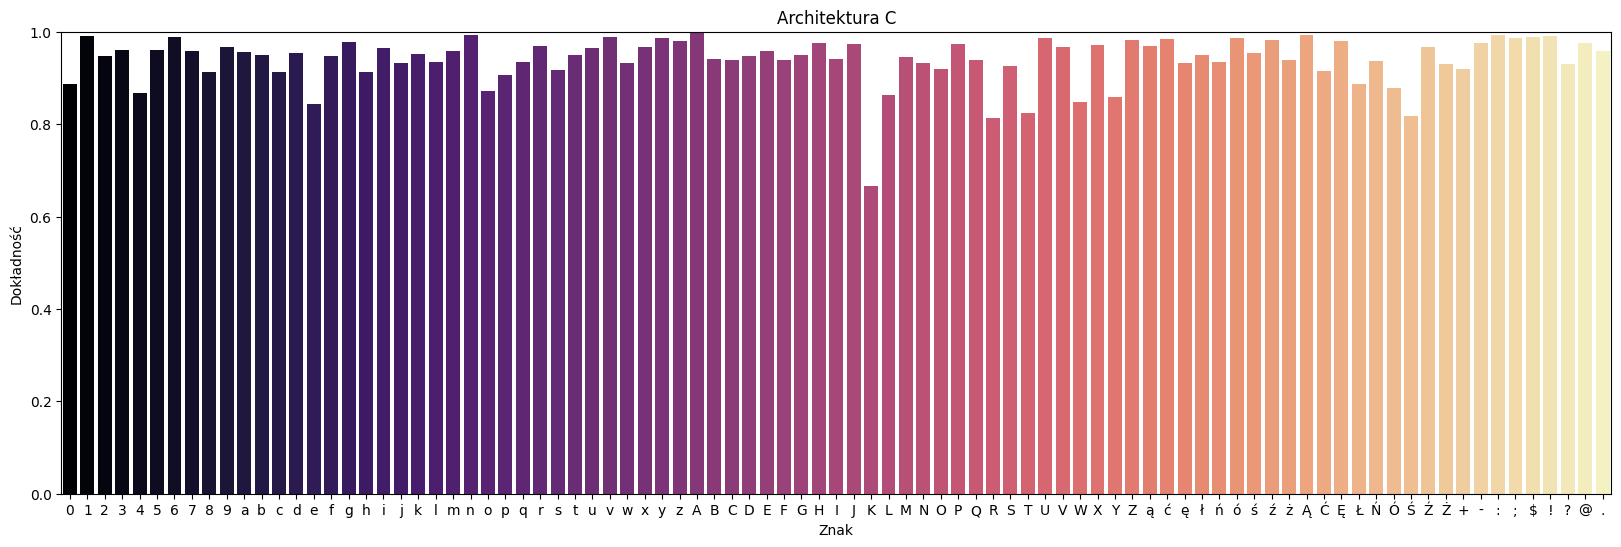

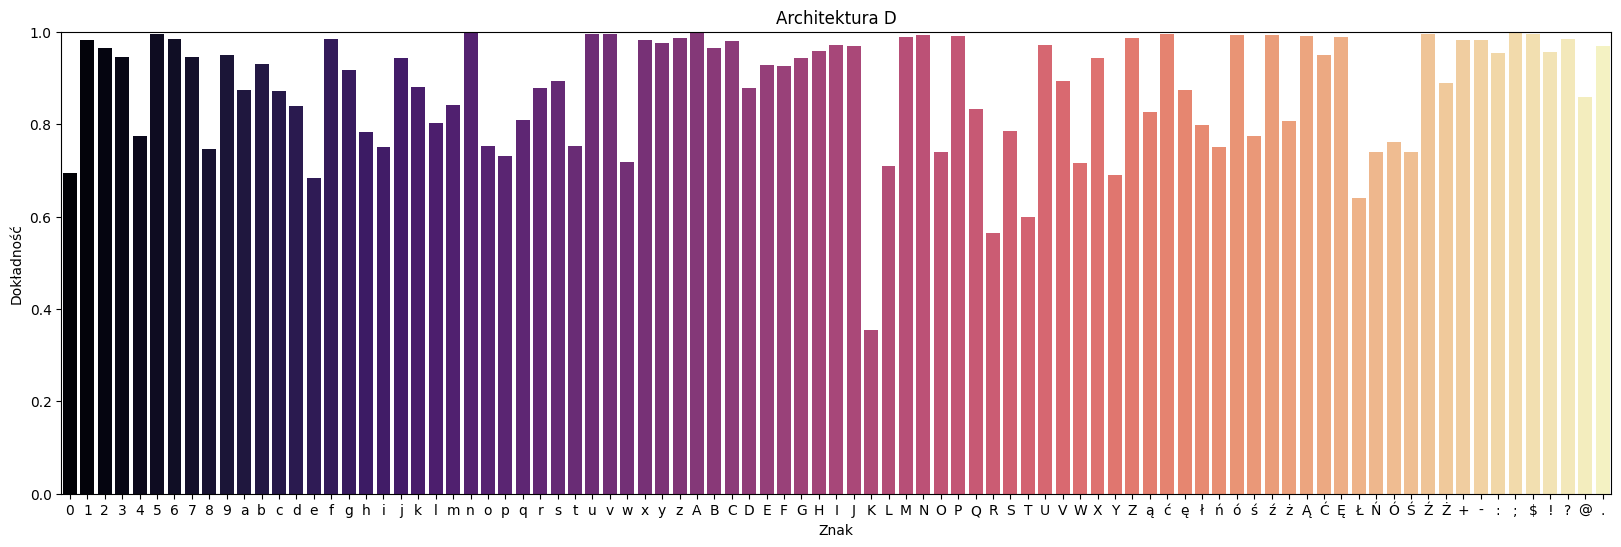

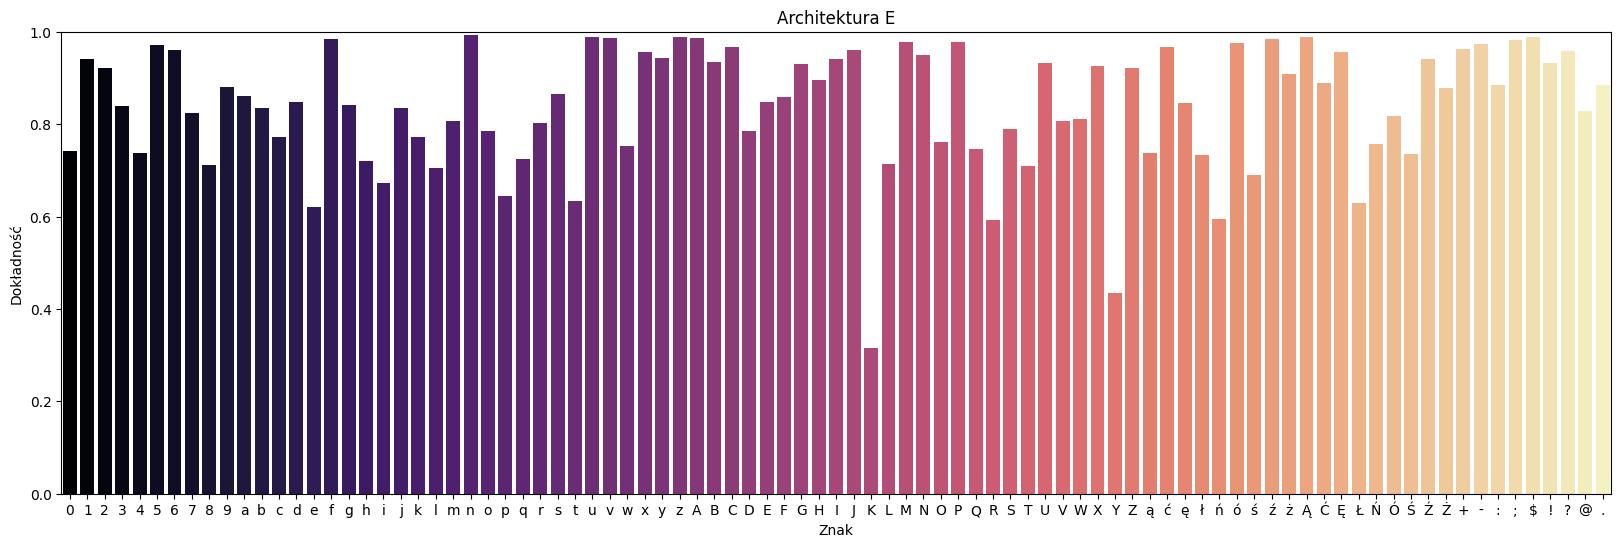

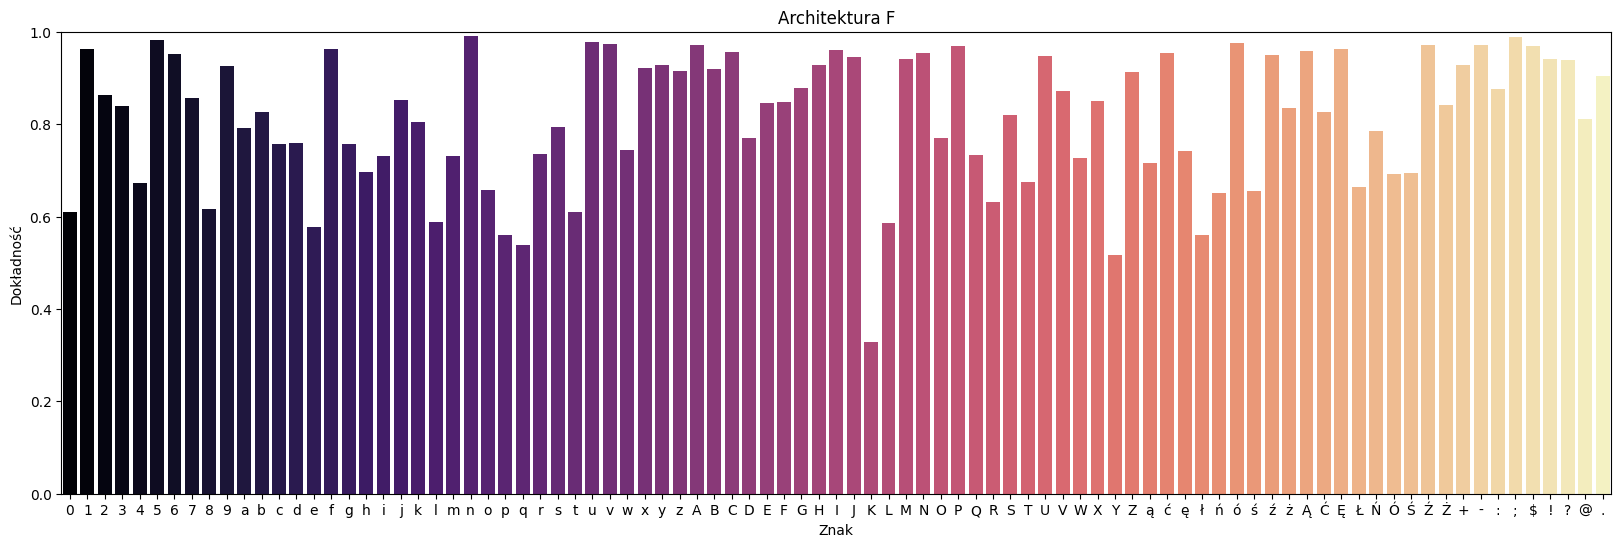

In [10]:
main_df = pd.DataFrame(columns=["class_name", "class_accuracy", "run_name"])
# from each run, download Table of results
for run_name in interesting_run_names:
    print("Getting results from run: ", run_name)
    run_id = get_runs(project_name, run_name)[0]
    api = wandb.Api()
    artifact = api.artifact(f"gratkadlafana/{project_name}/run-{run_id}-accuracy_per_class:v0")
    table = artifact.get("accuracy_per_class")

    # transform wandb table to Pandas dataframe by using for ndx, row in table.iterrows()
    class_accuracy = table.get_column("Accuracy", convert_to="numpy")
    class_name = table.get_column("Class", convert_to="numpy")
    df = pd.DataFrame({ "class_name": class_name, "class_accuracy": class_accuracy, "run_name": run_name })
    # append to main dataframe
    main_df = main_df.append(df, ignore_index=True)

# plot results - accuracy per class - show each run in a separate plot. There will be 5 plots. Title of each plot should be ith element from list architectures
number_of_plots = len(interesting_run_names)

for i, run_name in enumerate(interesting_run_names):
    fig, ax = plt.subplots(1, 1, figsize=(20, 6))
    df = main_df[main_df["run_name"] == run_name]
    ax.set_title(architectures[i])
    ax.set_ylim(0, 1)
    sns.barplot(x="class_name", y="class_accuracy", data=df, ax=ax, palette="magma")
    # set x axis label to "Znak"
    ax.set_xlabel("Znak")
    # set y axis label to "Dokładność"
    ax.set_ylabel("Dokładność")

    plt.show()

In [ ]:
run_name = interesting_run_names[0]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[0]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Bazowa
5 best classes:


,class_name,class_accuracy
67,ó,0.996753
83,;,0.996721
78,Ź,0.99513
30,u,0.995082
73,Ę,0.993453


5 worst classes:


,class_name,class_accuracy
25,p,0.634426
47,L,0.622549
68,ś,0.610837
76,Ó,0.570016
46,K,0.335188


In [ ]:
run_name = interesting_run_names[1]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[1]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architektura A
5 best classes:


,class_name,class_accuracy
112,n,1.0
156,ó,1.0
160,Ą,0.998374
173,$,0.998366
119,u,0.996721


5 worst classes:


,class_name,class_accuracy
93,4,0.902479
135,K,0.89847
141,Q,0.896648
89,0,0.876623
142,R,0.874183


In [ ]:
run_name = interesting_run_names[2]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[2]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architektura B
5 best classes:


,class_name,class_accuracy
262,$,1.0
261,;,1.0
249,Ą,0.996748
247,ź,0.996732
201,n,0.995122


5 worst classes:


,class_name,class_accuracy
238,Y,0.85155
203,p,0.85082
178,0,0.811688
182,4,0.804959
224,K,0.763561


In [ ]:
run_name = interesting_run_names[3]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[3]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architektura C
5 best classes:


,class_name,class_accuracy
350,;,0.996721
330,ć,0.988543
334,ó,0.987013
351,$,0.985294
297,u,0.985246


5 worst classes:


,class_name,class_accuracy
296,t,0.595082
284,h,0.586592
343,Ó,0.550247
320,R,0.54902
313,K,0.311544


In [ ]:
run_name = interesting_run_names[4]
df = main_df[main_df["run_name"] == run_name]
print(f"Architecture: {architectures[4]}")
print("5 best classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=False).head(5))
print("5 worst classes:")
display(df[["class_name","class_accuracy"]].sort_values(by="class_accuracy", ascending=True).head(5).sort_values(by="class_accuracy", ascending=False))

Architecture: Architektura D
5 best classes:


,class_name,class_accuracy
429,Ę,0.998363
439,;,0.996721
361,5,0.995082
379,n,0.993496
434,Ź,0.991883


5 worst classes:


,class_name,class_accuracy
373,h,0.641061
385,t,0.639344
381,p,0.616393
424,ś,0.600985
402,K,0.404729
